# Projeto de Trainee - Visão Computacional
Por Camilla de Oliveira Fonseca

<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="370">



Esse miniprojeto é na verdade uma missão secreta Jedi cujo objetivo é criar um sistema de segurança que classifica se uma imagem contém o Mestre Yoda, o Lord Sith Darth Vader ou algum Stormtrooper. Para isso está separado em 2 partes de 4 tarefas cada (Manipulação e Classificação).

# 1. Tarefas de Manipulação

## Tarefa 1.1
Criar uma função que recebe o endereço de uma imagem e retorna sua visualização.

### 1.1.1. Com Pillow

In [2]:
#Importando a classe Image da Pillow
from PIL import Image

def visualiza_img_pil(endereco):
    '''Recebe o endereco da img e retorna a visualizacao'''
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    # Exibe a img
    im.show()

In [3]:
visualiza_img_pil(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

A função *visualiza_img_pil()* exibe a imagem em uma janela. Para que a imagem apareça no notebook, criei *visualiza_img_pil2()*.

In [4]:
from PIL import Image
from IPython.display import display

def visualiza_img_pil2(endereco):
    
    # Cria um objeto Image 
    im = Image.open(endereco)
    
    #Exibe a img
    display(im)

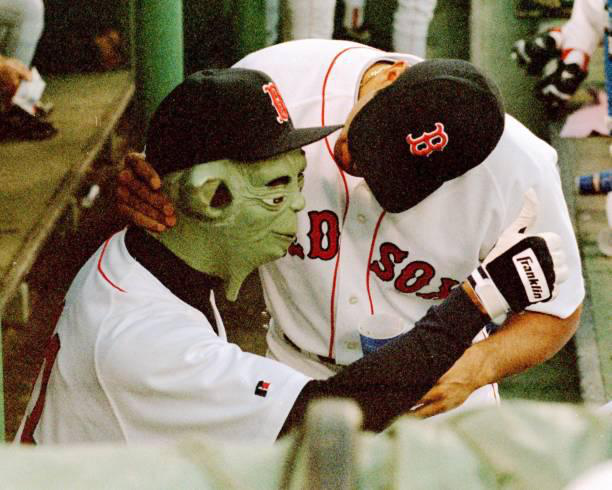

In [5]:
visualiza_img_pil2(r".\dataset\Yoda\11f8fb4cdec14a3184a3ab3e3d76d5ac265206c5.jpg")

Podemos ver o Yoda disfarçado de jogador de beisebol para se esconder dos Sith.

### 1.1.2. Com matplotlib

In [6]:
import matplotlib.pyplot as plt

def visualiza_img_plt(endereco):
    # Carrega a img como array
    img = plt.imread(endereco)
    
    # Exibe a imagem
    imgplot = plt.imshow(img)
    
    # Tira os eixos
    plt.axis('off')
    
    plt.show()

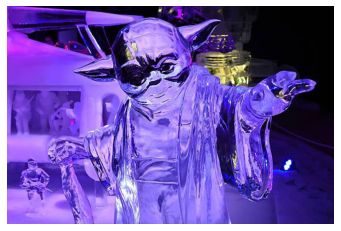

In [7]:
visualiza_img_plt(r".\dataset\Yoda\70a7274701636ab811e99afca3d32c2344f12526.jpg")

Vemos agora Yoda se camuflando com técnicas camaleônicas.

### 1.1.3. Com OpenCV

In [8]:
import numpy as np
import cv2

def visualiza_img_cv2(endereco):
    
    # Carrega a img
    img = cv2.imread(endereco)
    
    cv2.imshow('image',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
visualiza_img_cv2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

*visualiza_img_cv2()* também exibe a imagem em uma janela.

Agora usando OpenCV *e* Matplotlib:

In [10]:
def visualiza_img_cv2_2(endereco):
    
    # Carrega a img
    img_bgr = cv2.imread(endereco)
    
    # Converte a imagem para RGB, padrao do matplotlib, pq o da OpenCV eh BGR
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    plt.imshow(img_rgb)
    
    # Tira eixos
    plt.axis('off')
    
    plt.show()

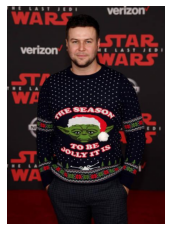

In [11]:
visualiza_img_cv2_2(r".\dataset\Yoda\9e6daae084d70410f13d482fb22c543f63871f7f.jpg")

Ele realmente dominou a arte do disfarce.

## Tarefa 1.2
Escrever função que converte uma imagem colorida em uma imagem preto e branco usando numpy. Depois ver como converter espaços de cores usando OpenCV.

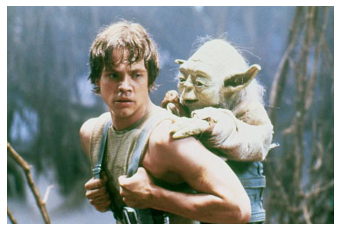

In [12]:
img_teste = plt.imread(r".\dataset\Yoda\ca30b75ea62ffa2730afe88aab4f0784c5505986.jpg")

def visualiza_img_rgb(img):
    '''Recebe um 3darray que representa uma imagem rgb e exibe sua visualizacao'''
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    
visualiza_img_rgb(img_teste)

### Usando numpy

Uma imagem colorida é representada como um array tridimensional, composto de três arrays bidimensionais (vulgo matrizes), contendo os valores de cada pixel para cada canal: vermelho, verde e azul (RGB). Para convertê-la em uma imagem em preto e branco (que terá um só canal), fazemos uma combinação linear dos valores de vermelho, verde e azul para cada pixel e pegamos o valor resultante em grayscale. A forma mais intuitiva de fazer isso é fazendo uma média dos três valores, mas há também a seguinte fórmula: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f84d67895d0594a852efb4a5ac421bf45b7ed7a8" width="400"> que foi estabelecida de acordo com a diferença na sensibilidade visual do olho humano para cada cor primária. R,G,Blinear correspondem à aplicação da expansão gamma dos valores de RGB que geralmente são armazenados com compressão gamma: <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b5eb0d87fe5e8f06d1000b348583e76e7d9ad32c" width="400">
Depois o Ylinear passa por compressão gamma novamente. Como essas operações tem alto custo computacional, usa-se também uma aproximação <img src="https://brohrer.github.io/images/image_processing/rgb2gray_eq_approx.png" width="300"> que é o que OpenCV faz. ([referência](https://www.kdnuggets.com/2019/12/convert-rgb-image-grayscale.html))

Implementarei a função com numpy usando a média.

In [13]:
def para_PeB_np(img_rgb):
    '''(3darray) -> 1darray
    Recebe uma imagem em rgb e retorna a conversao em preto e branco dessa imagem
    '''
    return np.mean(img_rgb, axis=2)

def visualiza_img_PeB(img_peb):
    '''Recebe um 1darray que representa uma imagem p&b e exibe sua visualizacao'''
    imgplot = plt.imshow(img_peb, cmap = 'gray')
    plt.axis('off')
    plt.show()

### Com OpenCV

In [14]:
def para_PeB_cv2(img_bgr):
    '''(3darray) -> 1darray
    Recebe uma imagem em bgr e retorna a conversao em preto e branco dessa imagem
    '''
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def visualiza_PeB_cv2(endereco):
    '''Recebe o endereco de uma imagem em rgb e exibe sua visualizacao em preto e branco
    '''
    img_rgb = cv2.imread(endereco)
    img_bw = para_PeB_cv2(img_rgb)
    imgplot = plt.imshow(img_bw, cmap = 'gray')
    plt.axis('off')
    plt.show()

Com numpy:


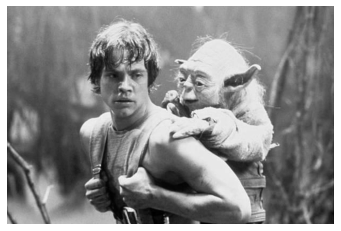

Com OpenCV:


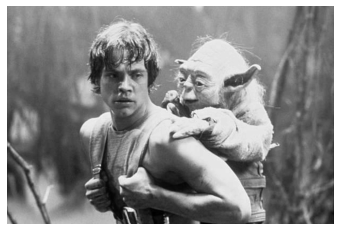

In [15]:
print("Com numpy:")
visualiza_img_PeB(para_PeB_np(img_teste))
print("Com OpenCV:")
visualiza_img_PeB(para_PeB_cv2(img_teste))

Podemos comparar o resultado dos dois métodos de conversão.

Vale notar também que OpenCV usa espaços BGR em vez de RGB, cuja diferença é a ordem dos canais no array tridimensional.

## Tarefa 1.3
Augmentation: fazer algumas modificações nas imagens existentes para criar imagens que contenham informações novas e aumentar o dataset.
Crie uma função que recebe uma imagem e aplica o processo de augmentation nela.
Técnicas a serem usadas:
    - Inverter a imagem (flip)
    - Rotacionar de um ângulo aleatório
    - Zoom aleatório na imagem
    - Contraste aleatório
    - Brilho aleatório

In [21]:
def rotaciona(img, ang_graus):
    '''(3darray, int) -> 3darray
    Recebe uma imagem e um angulo em graus e retorna a rotacao da imagem desse angulo.'''
    nlin,ncol,c = img.shape
    
    # Cria matriz de zeros
    img_rot = np.zeros([nlin,ncol,c], dtype=np.uint8)
    
    # Calcula coordenados do centro da imagem
    x_centro = (ncol+1)/2
    y_centro = (nlin+1)/2
    
    # Calcula seno e cosseno
    ang_rad = np.radians(ang_graus)
    sen_a = np.sin(ang_rad)
    cos_a = np.cos(ang_rad)
    
    # Rotaciona a imagem com base na matriz de rotacao transposta (transformacao inversa)
    for lin in range(nlin):
        for col in range(ncol):
            
            x = (lin - x_centro)*cos_a + (col - y_centro)*sen_a
            y = -(lin - x_centro)*sen_a + (col - y_centro)*cos_a
            x = int(np.round(x) + x_centro)
            y = int(np.round(y) + y_centro)
            
            if (x>=0 and y>=0 and x<nlin and y<ncol):
                img_rot[lin,col] = img[x,y]
                
    return img_rot

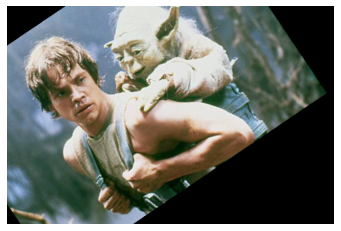

In [23]:
visualiza_img_rgb(rotaciona(img_teste, 34))